# Borrowed from Dan Spielman's 2018 course on Spectral graph theory #

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Path-Graphs" data-toc-modified-id="Path-Graphs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Path Graphs</a></span></li><li><span><a href="#Spectral-Graph-Drawing----a-grid-graph" data-toc-modified-id="Spectral-Graph-Drawing----a-grid-graph-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spectral Graph Drawing -- a grid graph</a></span></li><li><span><a href="#Isomorphism" data-toc-modified-id="Isomorphism-4"><span class="toc-item-num">3&nbsp;&nbsp;</span>Isomorphism</a></span></li><li><span><a href="#The-dodecahedron" data-toc-modified-id="The-dodecahedron-5"><span class="toc-item-num">4&nbsp;&nbsp;</span>The dodecahedron</a></span></li><li><span><a href="#Spectral-Clustering" data-toc-modified-id="Spectral-Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spectral Clustering</a></span></li></ul></div>

This is a Jupyter Notebook that contains Julia code I will run in the first lecture of Spectral Graph Theory.  I find experiments to be incredibly useful when working on spectral graph theory.  They help me figure out what is true, and they help me find counterexamples to my conjectures.

If you want to try using this, you will need to install Jupyter (via Python), Julia and IJulia.  You also need my package, called `Laplacians.jl`.  It may be added in Julia via

~~~
Using Pkg
Pkg.add("Laplacians")
~~~

In [1]:
using Laplacians
using LinearAlgebra
using Statistics
using Plots
using SparseArrays
using FileIO
using JLD2
using Random

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Path Graphs

In [2]:
M = path_graph(4)

4×4 SparseMatrixCSC{Float64,Int64} with 6 stored entries:
  [2, 1]  =  1.0
  [1, 2]  =  1.0
  [3, 2]  =  1.0
  [2, 3]  =  1.0
  [4, 3]  =  1.0
  [3, 4]  =  1.0

In [3]:
Matrix(M)

4×4 Array{Float64,2}:
 0.0  1.0  0.0  0.0
 1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0
 0.0  0.0  1.0  0.0

In [4]:
Matrix(lap(M))

4×4 Array{Float64,2}:
  1.0  -1.0   0.0   0.0
 -1.0   2.0  -1.0   0.0
  0.0  -1.0   2.0  -1.0
  0.0   0.0  -1.0   1.0

In [11]:
n = 20;
L = lap(path_graph(n));

In [12]:
E = eigen(Matrix(L))
println(E.values)

[0.0, 0.0246233, 0.097887, 0.217987, 0.381966, 0.585786, 0.824429, 1.09202, 1.38197, 1.68713, 2.0, 2.31287, 2.61803, 2.90798, 3.17557, 3.41421, 3.61803, 3.78201, 3.90211, 3.97538]


In [13]:
v2 = E.vectors[:,2]

20-element Array{Float64,1}:
 -0.3152529413498902  
 -0.30749036766932786 
 -0.29215636063472455 
 -0.26962849438992426 
 -0.24046147976757412 
 -0.20537350546744917 
 -0.16522855386712867 
 -0.12101512690846802 
 -0.0738219058991409  
 -0.024810944565717745
  0.02481094456571741 
  0.07382190589914044 
  0.12101512690846751 
  0.1652285538671284  
  0.20537350546744934 
  0.2404614797675739  
  0.26962849438992414 
  0.2921563606347252  
  0.307490367669328   
  0.31525294134988957 

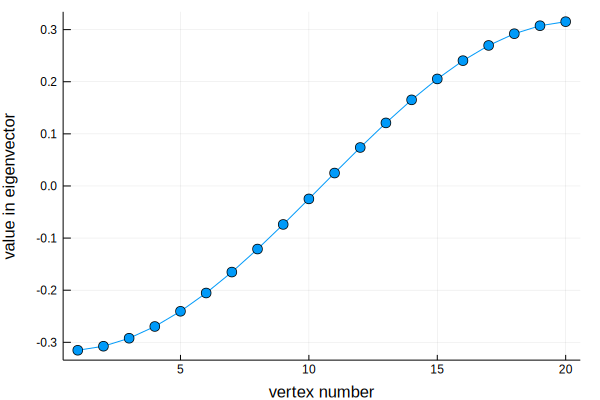

In [14]:
plot(v2,marker=5,legend=false)
xlabel!("vertex number")
ylabel!("value in eigenvector")

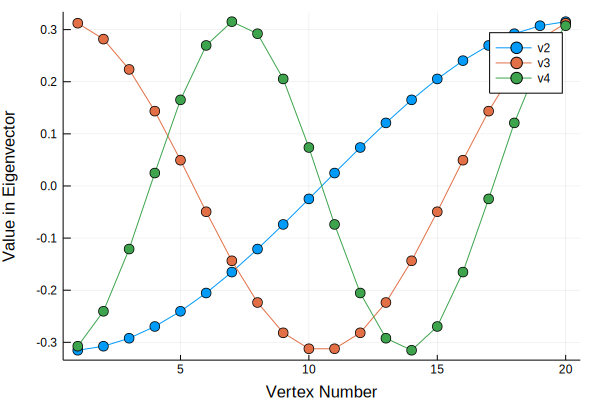

In [15]:
Plots.plot(E.vectors[:,2],label="v2",marker = 5)
Plots.plot!(E.vectors[:,3],label="v3",marker = 5)
Plots.plot!(E.vectors[:,4],label="v4",marker = 5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

In [16]:
scaledE = E.vectors ./ maximum(abs.(E.vectors); dims=1);

In [17]:
maximum(abs.(scaledE); dims=1)

1×20 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

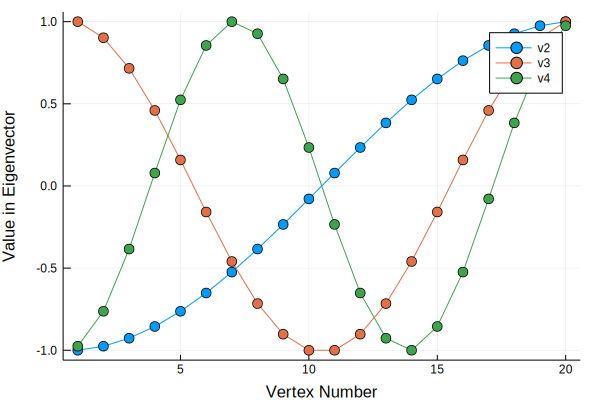

In [18]:
Plots.plot(scaledE[:,2],label="v2",marker = 5)
Plots.plot!(scaledE[:,3],label="v3",marker = 5)
Plots.plot!(scaledE[:,4],label="v4",marker = 5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

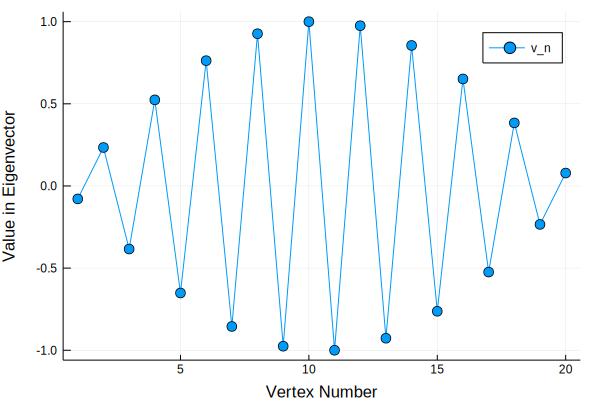

In [19]:
Plots.plot(scaledE[:,n],label="v_n",marker=5)
xlabel!("Vertex Number")
ylabel!("Value in Eigenvector")

# Spectral Graph Drawing -- a grid graph

In [30]:
M = grid2(5,5)
L = lap(M)
E = eigen(Matrix(L))
V = E.vectors[:,2:3]

25×2 Array{Float64,2}:
  0.025758     -0.37955    
  0.0933262    -0.302143   
  0.202654     -0.176896   
  0.311981     -0.0516488  
  0.37955       0.025758   
 -0.0516488    -0.311981   
  0.0159193    -0.234575   
  0.125247     -0.109328   
  0.234575      0.0159193  
  0.302143      0.0933262  
 -0.176896     -0.202654   
 -0.109328     -0.125247   
  1.28615e-16  -3.17535e-16
  0.109328      0.125247   
  0.176896      0.202654   
 -0.302143     -0.0933262  
 -0.234575     -0.0159193  
 -0.125247      0.109328   
 -0.0159193     0.234575   
  0.0516488     0.311981   
 -0.37955      -0.025758   
 -0.311981      0.0516488  
 -0.202654      0.176896   
 -0.0933262     0.302143   
 -0.025758      0.37955    

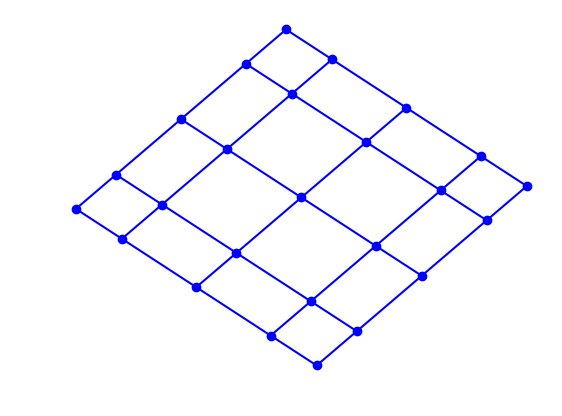

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14941c668>

In [31]:
plot_graph(M,V[:,1],V[:,2])

# Isomorphism

In [ ]:
Random.seed!(1)
p = randperm(size(M,1))
M = M[p,p]
E = eigen(Matrix(lap(M)))
V = E.vectors[:,2:3]
plot_graph(M,V[:,1],V[:,2], dots=false)

In [ ]:
M = latin_square_graph(5);
println(eigvals(Matrix(lap(M))))

# The dodecahedron

In [33]:
M = readIJV("dodec.txt")

20×20 SparseMatrixCSC{Float64,Int64} with 60 stored entries:
  [2 ,  1]  =  1.0
  [5 ,  1]  =  1.0
  [16,  1]  =  1.0
  [1 ,  2]  =  1.0
  [3 ,  2]  =  1.0
  [15,  2]  =  1.0
  [2 ,  3]  =  1.0
  [4 ,  3]  =  1.0
  [13,  3]  =  1.0
  [3 ,  4]  =  1.0
  [5 ,  4]  =  1.0
  [8 ,  4]  =  1.0
  ⋮
  [15, 17]  =  1.0
  [16, 17]  =  1.0
  [20, 17]  =  1.0
  [6 , 18]  =  1.0
  [16, 18]  =  1.0
  [19, 18]  =  1.0
  [9 , 19]  =  1.0
  [18, 19]  =  1.0
  [20, 19]  =  1.0
  [12, 20]  =  1.0
  [17, 20]  =  1.0
  [19, 20]  =  1.0

In [34]:
spectral_drawing(M)

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1441ea860>

In [35]:
E = eigen(Matrix(lap(M)))
println(E.values)

[-8.88178e-16, 0.763932, 0.763932, 0.763932, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.23607, 5.23607, 5.23607]


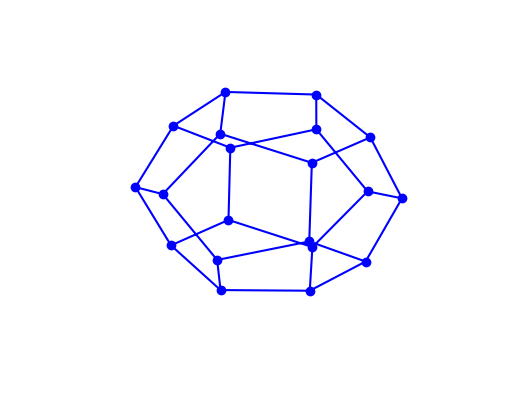

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13e13ac88>

In [36]:
using PyPlot: pygui
x = E.vectors[:,2]
y = E.vectors[:,3]
z = E.vectors[:,4]
pygui(false)
plot_graph(M, x, y, z; setaxis=false)

In [37]:
pygui(true)
plot_graph(M, x, y, z; setaxis=false)

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13e1880b8>

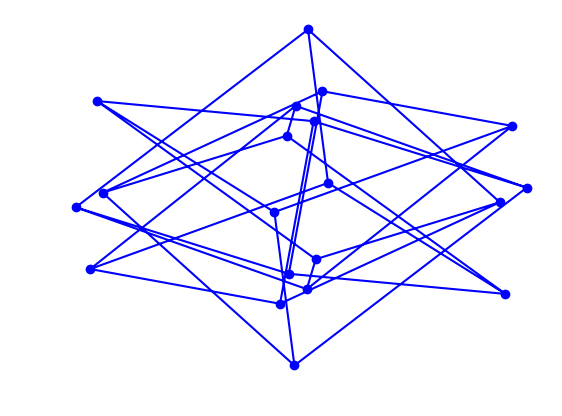

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13e2d4390>

In [38]:
x = E.vectors[:,11]
y = E.vectors[:,12]
pygui(false)
plot_graph(M, x, y; setaxis=false)

In [ ]:
x = E.vectors[:,11]
y = E.vectors[:,12]
z = E.vectors[:,10]
pygui(true)
plot_graph(M, x, y, z; setaxis=false)

In [39]:
n = 5;
g = grid3(4,5,6);
E = eigen(Matrix(lap(g)));

In [40]:
x = E.vectors[:,2]
y = E.vectors[:,3]
z = E.vectors[:,4]
pygui(true)
plot_graph(g, x, y, z; setaxis=false)

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13e423ef0>

# Spectral Clustering #

In [41]:
n = 10;
p = 0.7;
q = 0.2;

In [42]:
B = convert.(Int64, rand(n,n) .< q)

10×10 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  0  1  0  0  0
 0  0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  1  0  1
 1  0  0  1  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  1
 1  0  0  0  0  0  0  0  0  0
 1  0  0  1  0  0  1  0  0  1
 0  0  0  0  0  1  0  0  0  0
 0  1  0  0  0  0  0  0  0  1

In [43]:
A = convert.(Int64, rand(n,n) .< p);
triu!(A,1); # Take the upper trianguar part, above the first diagonal
A += A'; # Copy the upper triangular part to lower triangular

C = convert.(Int64, rand(n,n) .< p);
triu!(C,1);
C += C';

In [44]:
G = sparse([A B; B' C])

20×20 SparseMatrixCSC{Int64,Int64} with 166 stored entries:
  [3 ,  1]  =  1
  [5 ,  1]  =  1
  [6 ,  1]  =  1
  [8 ,  1]  =  1
  [9 ,  1]  =  1
  [10,  1]  =  1
  [4 ,  2]  =  1
  [5 ,  2]  =  1
  [6 ,  2]  =  1
  [8 ,  2]  =  1
  [9 ,  2]  =  1
  [10,  2]  =  1
  ⋮
  [20, 19]  =  1
  [4 , 20]  =  1
  [6 , 20]  =  1
  [8 , 20]  =  1
  [10, 20]  =  1
  [12, 20]  =  1
  [13, 20]  =  1
  [14, 20]  =  1
  [16, 20]  =  1
  [17, 20]  =  1
  [18, 20]  =  1
  [19, 20]  =  1

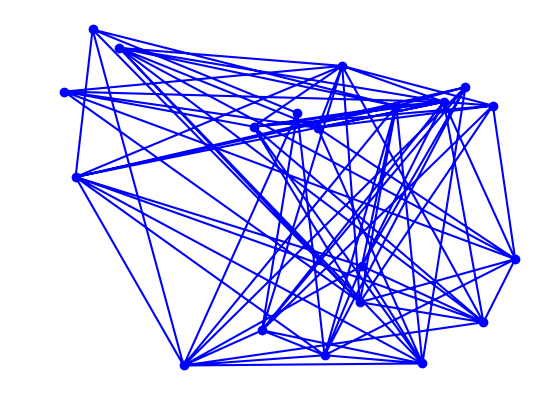

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13e242358>

In [45]:
pygui(false)
plot_graph(G, rand(2*n), rand(2*n))

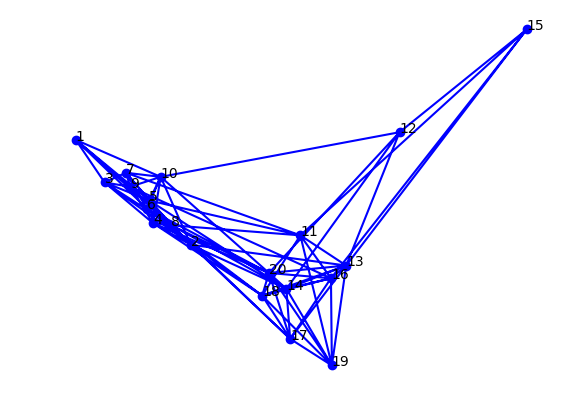

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13e8be588>

In [46]:
L = lap(G);
E = eigen(Matrix(L));
plot_graph(G, E.vectors[:,2], E.vectors[:,3]; number=true)

In [47]:
d = diag(L);
D_inv_half = spdiagm(0 => Vector(d.^(-0.5)))

20×20 SparseMatrixCSC{Float64,Int64} with 20 stored entries:
  [1 ,  1]  =  0.408248
  [2 ,  2]  =  0.333333
  [3 ,  3]  =  0.377964
  [4 ,  4]  =  0.353553
  [5 ,  5]  =  0.316228
  [6 ,  6]  =  0.353553
  [7 ,  7]  =  0.377964
  [8 ,  8]  =  0.288675
  [9 ,  9]  =  0.353553
  [10, 10]  =  0.333333
  [11, 11]  =  0.353553
  [12, 12]  =  0.447214
  [13, 13]  =  0.316228
  [14, 14]  =  0.316228
  [15, 15]  =  0.5
  [16, 16]  =  0.333333
  [17, 17]  =  0.353553
  [18, 18]  =  0.316228
  [19, 19]  =  0.377964
  [20, 20]  =  0.301511

In [48]:
N = D_inv_half * L * D_inv_half;
E = eigen(Matrix(N))
println(E.values)

[-8.88178e-16, 0.363826, 0.704803, 0.733326, 0.850693, 0.891757, 0.935496, 0.952946, 0.997947, 1.02308, 1.05566, 1.09273, 1.14637, 1.18384, 1.23254, 1.3039, 1.32366, 1.36169, 1.4086, 1.43716]


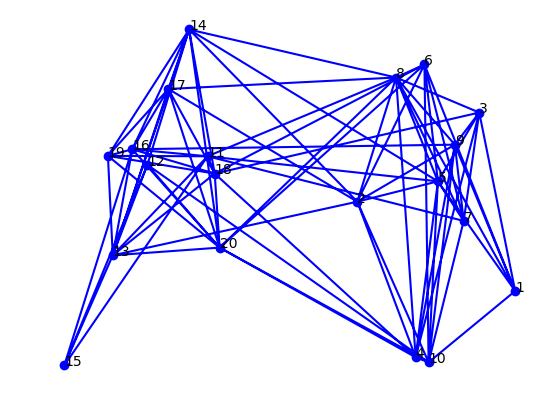

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13e9430f0>

In [49]:
plot_graph(G, D_inv_half * E.vectors[:,2], rand(2*n), number=true)

In [50]:
plot_graph(G, D_inv_half * E.vectors[:,2], D_inv_half * E.vectors[:,3], number = true)

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14219e278>